In [1]:
import os
import numpy as np
import pandas as pd
from scipy import optimize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [48]:
import pickle 

# # Đọc dữ liệu bệnh tim, phân loại nhị phân 
# with open('preprocessing/heart/X.pkl', 'rb') as f:
#     x = pickle.load(f)
# with open('preprocessing/heart/y.pkl', 'rb') as f:
#     y = pickle.load(f)
# # Chuyển label về dạng onhot vector
# lb = LabelBinarizer()
# lb.fit(y)
# y = lb.transform(y)
# y = y.reshape(1, -1)[0]
# y

# Đọc dữ liệu thuốc điều trị, phân loại nhiều lớp
with open('preprocessing/drug/X.pkl', 'rb') as f:
    x = pickle.load(f)
with open('preprocessing/drug/y.pkl', 'rb') as f:
    y = pickle.load(f)
y = y.values

print('So luong du lieu: ', len(x))
print('So luong nhan: ', len(y))

So luong du lieu:  200
So luong nhan:  200


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=10)

In [50]:
x_train

array([[0.84745763, 1.        , 0.        , 1.        , 0.15857777],
       [0.57627119, 1.        , 0.        , 1.        , 0.        ],
       [0.79661017, 1.        , 1.        , 0.        , 0.32287823],
       [0.44067797, 0.        , 1.        , 1.        , 0.52023266],
       [0.18644068, 0.        , 0.        , 1.        , 0.18881731],
       [0.54237288, 1.        , 0.5       , 0.        , 0.12023891],
       [0.54237288, 0.        , 0.5       , 0.        , 0.11876915],
       [0.96610169, 0.        , 0.5       , 1.        , 0.26183626],
       [0.89830508, 0.        , 1.        , 1.        , 0.64985302],
       [0.84745763, 0.        , 0.5       , 1.        , 0.23453624],
       [0.74576271, 0.        , 1.        , 0.        , 0.23813247],
       [0.6440678 , 1.        , 1.        , 0.        , 0.24591907],
       [0.3559322 , 1.        , 0.5       , 1.        , 0.16120458],
       [0.        , 1.        , 1.        , 0.        , 0.08802927],
       [0.57627119, 0.        , 1.

In [51]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test, y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 86.67%


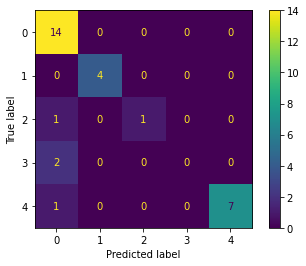

In [52]:
# Hiển thị confusion matrix
plot_confusion_matrix(lr, x_test, y_test)

In [9]:
from sklearn.metrics import precision_score, recall_score
recall_s = recall_score(y_test, lr.predict(x_test), average=None)
print('Tỉ lệ dự đoán đúng người bị bệnh là ', recall_s[1])
print('Tỉ lệ dự đoán đúng người không bị bệnh là', recall_s[0])

Tỉ lệ dự đoán đúng người bị bệnh là  0.7777777777777778
Tỉ lệ dự đoán đúng người không bị bệnh là 0.9130434782608695


In [53]:
def sigmoid(z):

    z = np.array(z)
    
    g = np.zeros(z.shape)

    import math
    g = 1 / (1 + math.e**(-z))
    
    return g

## 1 Logistic Regression

In [54]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = x_train.shape

# Add intercept term to X
x_train = np.concatenate([np.ones((m, 1)), x_train], axis=1)
x_train
# y_train

array([[1.        , 0.84745763, 1.        , 0.        , 1.        ,
        0.15857777],
       [1.        , 0.57627119, 1.        , 0.        , 1.        ,
        0.        ],
       [1.        , 0.79661017, 1.        , 1.        , 0.        ,
        0.32287823],
       ...,
       [1.        , 0.08474576, 0.        , 1.        , 1.        ,
        0.09418976],
       [1.        , 0.69491525, 1.        , 0.5       , 0.        ,
        0.27350053],
       [1.        , 0.28813559, 0.        , 0.        , 1.        ,
        0.12580524]])

In [55]:
def costFunction(theta, X, y):

    # Initialize some useful values
    m = y.size  # number of training examples

    J = 0
    grad = np.zeros(theta.shape)

    
    ytp = np.transpose(y)
    ttp = np.transpose(theta)
    uni = (np.ones(y.shape))
#     print((ytp * np.log(sigmoid(X * theta))))
#     print(np.dot( X, theta))
#     print(y)
    m = np.size(X,0)
    n = np.size(X,1)
#     J = -1/m *  (y * np.log(sigmoid(np.dot( X, theta) + np.subtract(uni, y) * np.log(np.subtract(uni, sigmoid(np.dot( X, theta)))))))
    
    for i in range(m):
        J += -1/m *  (y[i] * np.log(sigmoid(np.dot(ttp,X[i]))) + (1-y[i]) * np.log(1 - sigmoid(np.dot( ttp, X[i]))))
       
    for i in range(n):
        tgrad = 0
        for j in range(m):
            tgrad += ( sigmoid(np.dot(ttp, X[j])) - y[j] ) * X[j,i]
#             print (tgrad)
        grad[i] = 1/m * tgrad

    return J, grad

In [56]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, x_train, y_train)

# np.set_printoptions(precision=3)

print(len(grad))

print('Cost at initial theta (zeros): {:.3f}'.format(cost))

print('Gradient at initial theta (zeros):')
print(grad)


# Compute and display cost and gradient with non-zero theta
test_theta = np.ones(n+1) * 0.01
cost, grad = costFunction(test_theta, x_train, y_train)

print('Cost at test theta: {:.3f}'.format(cost))

print('Gradient at test theta:')
print(grad)

6
Cost at initial theta (zeros): 0.693
Gradient at initial theta (zeros):
[-1.10588235 -0.56311067 -0.64705882 -0.81323529 -0.57058824 -0.07298989]
Cost at test theta: 0.656
Gradient at test theta:
[-1.09765028 -0.55871034 -0.6420812  -0.80896968 -0.56614432 -0.07046706]


In [57]:
initial_theta = np.zeros(n+1)
# set options for optimize.minimize

options= {'maxiter': 400}

res = optimize.minimize(costFunction,
                        initial_theta,
                        (x_train, y_train),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is  in the x property
theta = res.x

# Print theta to screen
print(cost)

print(theta)

C:\Users\dovan\AppData\Local\Temp/ipykernel_13768/276752345.py:21: RuntimeWarning: divide by zero encountered in log
  J += -1/m *  (y[i] * np.log(sigmoid(np.dot(ttp,X[i]))) + (1-y[i]) * np.log(1 - sigmoid(np.dot( ttp, X[i]))))
C:\Users\dovan\AppData\Local\Temp/ipykernel_13768/276752345.py:21: RuntimeWarning: invalid value encountered in multiply
  J += -1/m *  (y[i] * np.log(sigmoid(np.dot(ttp,X[i]))) + (1-y[i]) * np.log(1 - sigmoid(np.dot( ttp, X[i]))))
C:\Users\dovan\AppData\Local\Temp/ipykernel_13768/276752345.py:21: RuntimeWarning: invalid value encountered in double_scalars
  J += -1/m *  (y[i] * np.log(sigmoid(np.dot(ttp,X[i]))) + (1-y[i]) * np.log(1 - sigmoid(np.dot( ttp, X[i]))))


-4.424000918561065
[ 1.79657349  0.23080002  0.45794639  3.97334255  1.93771242 -8.77309294]


In [58]:
print(len(theta))

6


In [59]:
m, n = x_test.shape
x_test = np.concatenate([np.ones((m, 1)), x_test], axis=1)

In [60]:
def predict(theta, X):
    
    m = X.shape[0] # Number of training examples


    p = np.zeros(m)


    for i in range (m):
        tmp = sigmoid(np.dot(np.transpose(theta), X[i]))
#         print(tmp)
#         print("-----------" , i)
        if (tmp < 0.5):
            p[i] = 0
        else:
            p[i] = 1

    return p

In [61]:
# Compute accuracy on our training set
p = predict(theta, x_test)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y_test) * 100))

Train Accuracy: 43.33 %


In [62]:
print (p)
print (len(p))

[0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 1.]
30


In [63]:
print(y_test)
print(len(y_test))

[0 0 0 0 0 4 0 0 4 4 4 4 3 3 4 0 0 1 2 1 0 0 4 1 4 0 0 0 1 2]
30


In [64]:
def costFunctionReg(theta, X, y, lambda_):
  
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    tmpT = 0
    n = 0
    n = np.size(theta, 0) 
    cost, grad = costFunction(theta, X, y)
    for i in range (n):
        if (i == 0):
            continue
        tmpT += theta[i] * theta[i]
        
        grad[i] = grad[i] + lambda_/m * theta[i]
    J = cost + lambda_ * tmpT /(2*m)
            
    return J, grad

In [65]:
# Initialize fitting parameters
initial_theta = np.zeros(x_train.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
lambda_ = 1

# set options for optimize.minimize
options= {'maxiter': 100}

res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (x_train, y_train, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of OptimizeResult object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property of the result
theta = res.x


# Compute accuracy on our training set
p = predict(theta, x_test)

print('Train Accuracy: %.2f %%' % (np.mean(p == y_test) * 100))

C:\Users\dovan\AppData\Local\Temp/ipykernel_13768/276752345.py:21: RuntimeWarning: divide by zero encountered in log
  J += -1/m *  (y[i] * np.log(sigmoid(np.dot(ttp,X[i]))) + (1-y[i]) * np.log(1 - sigmoid(np.dot( ttp, X[i]))))
C:\Users\dovan\AppData\Local\Temp/ipykernel_13768/276752345.py:21: RuntimeWarning: invalid value encountered in multiply
  J += -1/m *  (y[i] * np.log(sigmoid(np.dot(ttp,X[i]))) + (1-y[i]) * np.log(1 - sigmoid(np.dot( ttp, X[i]))))
C:\Users\dovan\AppData\Local\Temp/ipykernel_13768/276752345.py:21: RuntimeWarning: invalid value encountered in double_scalars
  J += -1/m *  (y[i] * np.log(sigmoid(np.dot(ttp,X[i]))) + (1-y[i]) * np.log(1 - sigmoid(np.dot( ttp, X[i]))))


Train Accuracy: 40.00 %
